<a href="https://colab.research.google.com/github/shreyakumaran/Student-Placement_prediction-model/blob/main/Student_PLacement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student** **Placement** **Prediction** **Model**
---




# Import **libraries**

In [ ]:
!pip install plotly
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
!pip install matplotlib --upgrade


import plotly.express as px


import seaborn as sns
from sklearn.decomposition import PCA

from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


# **Load the dataset**

In [ ]:
import pandas as pd
import io

dataframe = pd.read_csv('collegePlace.csv')
print(dataframe)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

# **Data Preprocessing**

In [ ]:
dataframe.shape

(2966, 8)

In [ ]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
dataframe.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
365,22,Male,Electronics And Communication,0,7,0,0,0
1631,23,Male,Information Technology,1,8,0,0,1
562,22,Male,Electrical,1,7,0,1,0
2656,20,Male,Computer Science,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [ ]:
dataframe.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
dataframe.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
dataframe.corr()['PlacedOrNot']

<ipython-input-14-f1715914c371>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()['PlacedOrNot']


Age                  0.046943
Internships          0.179334
CGPA                 0.588648
Hostel              -0.038182
HistoryOfBacklogs   -0.022337
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

In [ ]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
print(dataframe.duplicated().sum())


dataframe.drop_duplicates(inplace=True)

1829


In [ ]:
print(dataframe.duplicated().sum())

0


In [ ]:

fig = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot",
                 hover_data=['CGPA'])
fig.show()

In [ ]:
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')

In [ ]:
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')
figure.show()

In [ ]:
print("Max Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].max()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])
print("Min Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].min()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])

Max Age of Placed Person:  30
Min Age of Placed Person:  19


In [ ]:
print("Max Internships Done by the Placed Student: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])
print("No of students who did max Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])

print("Min Internships Done by the Placed Person: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])
print("No of students who did min Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])

Max Internships Done by the Placed Student:  3
No of students who did max Internships and are placed:  35
Min Internships Done by the Placed Person:  0
No of students who did min Internships and are placed:  232


In [ ]:

print("Max CGPA of Placed Student: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])
print("No of students has max CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])

print("Min CGPA of Placed Person: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])
print("No of students has min CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])

Max CGPA of Placed Student:  9
No of students has max CGPA and are placed:  99
Min CGPA of Placed Person:  5
No of students has min CGPA and are placed:  5


In [ ]:
df = px.data.tips()
figure = px.box(dataframe, y='CGPA')
figure.show()

In [ ]:
figure = px.box(dataframe, y='Age')
figure.show()

In [ ]:
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
dataframe['Stream'] = dataframe['Stream'].map({'Electronics And Communication': 1,
                                 'Computer Science': 2,
                                'Information Technology': 3,
                                'Mechanical':4,
                                'Electrical':5,
                                'Civil':6})

In [ ]:
dataframe.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1523,20,1,5,1,8,0,0,1
32,21,0,6,1,7,0,0,0
276,21,1,6,0,7,0,0,0
1972,19,1,4,1,8,1,0,1
1564,23,1,6,0,8,0,0,1


In [ ]:
print(X.shape)
print(y.shape)


(1137, 7)
(1137,)


In [ ]:
X = dataframe.iloc[:,0:7]
y = dataframe.iloc[:,-1]
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2946,23,1,3,1,7,1,1
2952,23,1,4,0,8,1,0
2954,23,0,2,1,8,0,1
2958,23,1,2,0,6,0,1


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=125)

NameError: ignored

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(761, 7)
(376, 7)
(761,)
(376,)


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# **USING LOGISTIC REGRESSION ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Without Scaling
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

#scaling has not much effect

Without Scaling and CV:  0.7526595744680851
Without Scaling and With CV:  0.6978298017771701
With Scaling and Without CV:  0.7553191489361702
With Scaling and With CV:  0.6991455912508544


<Axes: xlabel='CGPA', ylabel='Internships'>

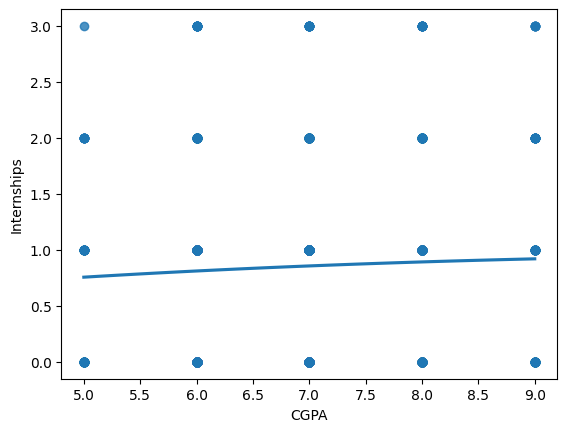

In [ ]:
x = dataframe['CGPA']
y = dataframe['Internships']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=dataframe, logistic=True, ci=None)

# **USING DECISION TREE ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

#without scaling
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7606382978723404
Without Scaling and With CV:  0.7147470950102529
With Scaling and Without CV:  0.7606382978723404
With Scaling and With CV:  0.7147470950102529


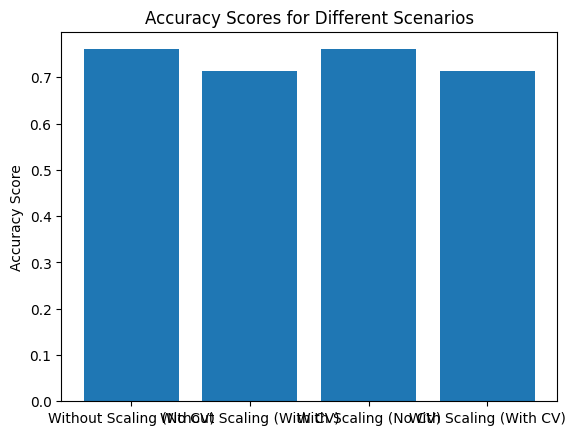

In [ ]:
import matplotlib.pyplot as plt

# Your code for classifier training and predictions here...

# Create a list of labels for the different scenarios
labels = ["Without Scaling (No CV)", "Without Scaling (With CV)", "With Scaling (No CV)", "With Scaling (With CV)"]

# Create a list of accuracy scores corresponding to each scenario
accuracy_scores = [accuracy_score(y_test, y_pred), scores.mean(), accuracy_score(y_test, y_pred), scores.mean()]

# Create a bar chart
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Scenarios')

# Show the plot
plt.show()

## **USING NAIVE BAYES ALGORITHM WITH DIFFERENT LIBRARIES** (GaussianNB,MultinomialNB,BernoulliNB and CategoricalNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7819148936170213
Without Scaling and With CV:  0.7345352016404647
With Scaling and Without CV:  0.7819148936170213
With Scaling and With CV:  0.7345352016404647


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.648936170212766
Without Scaling and With CV:  0.6215652768284348


In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.5824468085106383
Without Scaling and With CV:  0.5597915242652085
With Scaling and Without CV:  0.675531914893617
With Scaling and With CV:  0.6702665755297335


Without Scaling and CV:  0.5597915242652085
With Scaling and CV:  0.6702665755297335


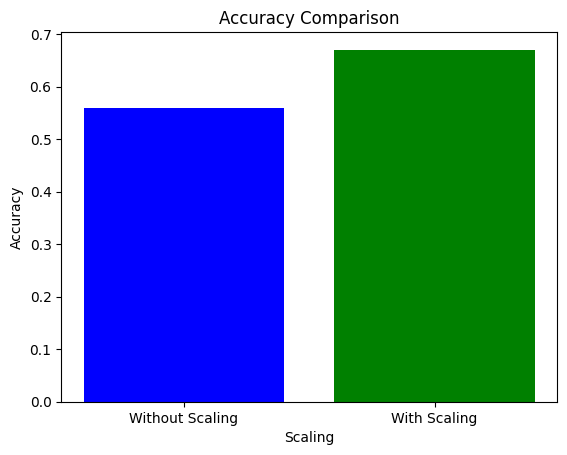

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracy_scores_without_scaling = []
accuracy_scores_with_scaling = []

# Create a Bernoulli Naive Bayes classifier
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_scores_without_scaling.append(accuracy_score(y_test, y_pred))

# With scaling
classifier.fit(X_train_scale, y_train)
y_pred = classifier.predict(X_test_scale)
accuracy_scores_with_scaling.append(accuracy_score(y_test, y_pred))

# Calculate cross-validation scores
scores_without_scaling = cross_val_score(classifier, X_train, y_train, cv=10)
scores_with_scaling = cross_val_score(classifier, X_train_scale, y_train, cv=10)

# Print and plot the results
print("Without Scaling and CV: ", scores_without_scaling.mean())
print("With Scaling and CV: ", scores_with_scaling.mean())

# Create a bar plot to compare accuracy scores
labels = ['Without Scaling', 'With Scaling']
accuracy_scores = [scores_without_scaling.mean(), scores_with_scaling.mean()]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Scaling')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
from sklearn.naive_bayes import CategoricalNB
classifier = CategoricalNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))

Without Scaling and CV:  0.8164893617021277


# **USING RANDOM FOREST ALGORITHM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10, random_state=0)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7898936170212766
Without Scaling and With CV:  0.7489576213260423
With Scaling and Without CV:  0.7898936170212766
With Scaling and With CV:  0.746326042378674


In [ ]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Without CV:  0.7898936170212766
With CV:  0.7489576213260423
Precision Score:  0.8365384615384616
Recall Score:  0.7945205479452054
F1 Score:  0.8149882903981264


# **USING SUPPORT VECTOR MACHINE(SVC)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
classifier = GridSearchCV(svc, parameters)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7686170212765957
Without Scaling and With CV:  0.7109706083390294
With Scaling and Without CV:  0.7819148936170213
With Scaling and With CV:  0.7620984278879016


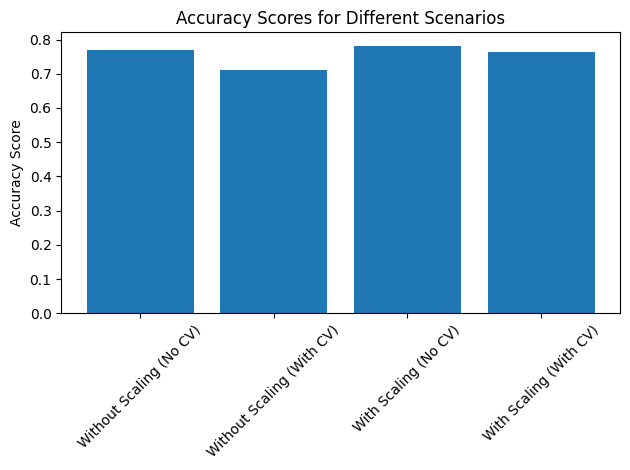

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for GridSearchCV
parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10]}

# Initialize the SVM classifier with grid search
svc = SVC()
classifier = GridSearchCV(svc, parameters)

# Lists to store results
labels = []
accuracy_scores = []

# Loop through the scaling scenarios
for scaling, X_train_data, X_test_data in [("Without Scaling", X_train, X_test), ("With Scaling", X_train_scale, X_test_scale)]:
    # Fit the classifier
    classifier.fit(X_train_data, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_data)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate cross-validation scores
    scores = cross_val_score(classifier, X_train_data, y_train, cv=10)
    mean_cv_score = scores.mean()

    # Append results to lists
    labels.append(f"{scaling} (No CV)")
    labels.append(f"{scaling} (With CV)")
    accuracy_scores.append(accuracy)
    accuracy_scores.append(mean_cv_score)

# Create a bar chart
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Scenarios')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import NuSVC
classifier = NuSVC()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling
classifier.fit(X_train_scale,y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7712765957446809
Without Scaling and With CV:  0.7502734107997265
With Scaling and Without CV:  0.7845744680851063
With Scaling and With CV:  0.7528879015721122


# **CONCLUSION**

Out of all the algorithms used, Random forest classifier showed the highest accuracy.

In [ ]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=5,max_features=None,
                             min_samples_split=2,
                             n_estimators=100, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Without CV:  0.851063829787234
With CV:  0.8107142857142857
Precision Score:  0.9766081871345029
Recall Score:  0.7625570776255708
F1 Score:  0.8564102564102564


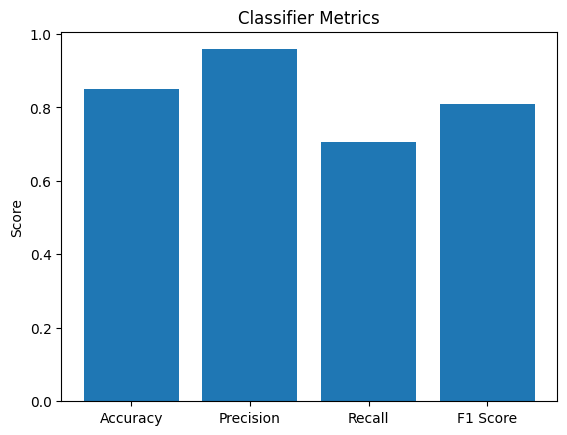

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(bootstrap=False, max_depth=5, max_features=None, min_samples_split=2, n_estimators=100, random_state=0)

# Lists to store results
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = []

# Loop through the metrics
for metric in metrics:
    if metric == "Accuracy":
        # Fit the classifier and calculate accuracy
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = accuracy_score(y_test, y_pred)
    else:
        # Calculate the metric with cross-validation
        if metric == "Precision":
            score = cross_val_score(classifier, X_train, y_train, cv=10, scoring='precision').mean()
        elif metric == "Recall":
            score = cross_val_score(classifier, X_train, y_train, cv=10, scoring='recall').mean()
        elif metric == "F1 Score":
            score = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1').mean()

    # Append the metric score to the list
    scores.append(score)

# Create a bar chart
plt.bar(metrics, scores)
plt.ylabel('Score')
plt.title('Classifier Metrics')

# Show the plot
plt.show()